In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# load dataset
cust_serv_df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

# 1. Understand the dataset:

In [3]:
cust_serv_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# Identify the shape of the dataset
cust_serv_df.shape

(364558, 53)

# Identify variables with null values

In [5]:
# gather info about dataset
cust_serv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [6]:
# create a Series of booleans for Null values
null_series = cust_serv_df.isna().any()

# create an empty list and add to it the indecies that have null values to create a list of all variables with any null values
list_null = []
for index in null_series.index:
    if null_series[index] == True:
        list_null.append(index)

In [7]:
# make a list of all columns that don't have null values

non_null = [x for x in cust_serv_df.columns if x not in list_null]

In [8]:
# non_null

# 2. Perform basic data exploratory analysis:

# Utilize missing value treatment

In [9]:
# Check columns with null values

list_null

['Closed Date',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Due Date',
 'Resolution Action Updated Date',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'School Region',
 'School Code',
 'School Zip',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name',
 'Latitude',
 'Longitude',
 'Location']

In [10]:
# Display the rows that contain the missing values for a given column to explore the data

cust_serv_df[cust_serv_df['City'].isnull()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
33,32306700,12/31/2015 11:18:10 PM,01/02/2016 01:04:03 AM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,NaN,25-0-25-54 12TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,32309451,12/31/2015 05:40:16 PM,01/01/2016 10:59:11 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NaN,72-23-72-2 72ND PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,32309860,12/31/2015 05:05:30 PM,01/01/2016 08:17:35 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,NaN,9-15-9-99 CORNAGA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,32309308,12/31/2015 09:58:06 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363789,29619230,01/02/2015 07:25:16 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,2101-2527 INDEPENDENCE AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363805,29618672,01/02/2015 06:14:06 AM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,217-0-217- 89TH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364053,29618280,01/01/2015 07:24:31 PM,01/01/2015 11:44:53 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,106 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364151,29617561,01/01/2015 04:04:35 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NaN,6940-6966 62ND AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Check the unique values used in a given column

cust_serv_df['Ferry Terminal Name'].unique()

array([nan, 'St. George Terminal (Staten Island)', 'Barberi'],
      dtype=object)

 - Observing the data, most of the missing data is contained in columns that give details around the complaint (Zip codes, Landmarks, Vehicle Type, etc.)
 - These seem to be best filled as 'Not Filled In' and not something like 'Not Applicable' because we can't be sure the information wasn't related to the complaint, all we know is it not's filled out (i.e. we can't be certain that 'Vehicle Type' wasn't useful information for a given complaint, all we know is the information isn't there)
  - Only four columns seem to me to need unique values -- 'Closed Date', 'City', 'Due Date', and 'Resolution Action Updated Date' -- as these either pertain to the status of the given complaint or to a value that should be required ('City')

In [12]:
# Basic code to fill null columns with a given value

cust_serv_df.fillna('Not Filled In', inplace=True)

In [13]:
# Check if any null values remain in our Dataframe

cust_serv_df.isna().any().unique()

array([False])

In [14]:
# Replace 'Not Filled In' with what we want for the four columns mentioned

cust_serv_df['Closed Date'].replace('Not Filled In', 'Not Closed', inplace=True)

cust_serv_df['City'].replace('Not Filled In', 'NONE GIVEN', inplace=True)

cust_serv_df['Due Date'].replace('Not Filled In', 'No Due Date Set', inplace=True)

cust_serv_df['Resolution Action Updated Date'].replace('Not Filled In', 'Not Resolved', inplace=True)

In [15]:
# Confirm the replacement was successful

cust_serv_df[cust_serv_df['Closed Date'] == 'Not Closed'].head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
416,32305700,12/31/2015 02:16:04 PM,Not Closed,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,Not Filled In,5426-5526 90TH ST,...,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In
611,32309308,12/31/2015 09:58:06 AM,Not Closed,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,Not Filled In,30 STREET,...,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In
1648,32303348,12/30/2015 05:13:42 AM,Not Closed,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,Not Filled In,21600-2169 91ST AVE,...,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In
1816,32294519,12/29/2015 10:44:50 PM,Not Closed,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,Not Filled In,127 STREET,...,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In
1965,32296487,12/29/2015 07:09:13 PM,Not Closed,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,Not Filled In,5201-5299 68TH ST,...,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In,Not Filled In


# Analyze the date column and remove the entries if it has an incorrect timeline

In [16]:
# make a dataframe of just the response times

time_df = cust_serv_df[['Created Date', 'Closed Date']]

In [17]:
# Remove the rows that have 'Not Closed'

time_df.drop(time_df.index[time_df['Closed Date'] == 'Not Closed'], inplace=True)

In [18]:
# convert the times to the right type to compare

time_df['Created Time Number'] = pd.to_datetime(time_df['Created Date'])
time_df['Closed Time Number'] = pd.to_datetime(time_df['Closed Date'])

In [19]:
# function to determine if the Created Date is after the Closed Date

bad_times = time_df['Created Time Number'] > time_df['Closed Time Number']

In [20]:
# Checking if any of the entries fail the above test

bad_times.unique()

array([False])

# Draw a frequency plot for city-wise complaints

* when doing this, noticed that some cities are in there twice -- once as 'ASTORIA' and once as 'Astoria'. Need to make entire City column uppercase to avoid miscounting data

In [21]:
# display list with duplicates

city_list = cust_serv_df['City'].unique()
city_list

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'NONE GIVEN',
       'RIDGEWOOD', 'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND',
       'OZONE PARK', 'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [22]:
# converting all to uppercase

cust_serv_df['City'] = cust_serv_df['City'].str.upper()

In [23]:
# duplicates gone

cust_serv_df['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'NONE GIVEN',
       'RIDGEWOOD', 'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND',
       'OZONE PARK', 'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS'],
      dtype=object)

Text(0, 0.5, 'Total Number of Complaints')

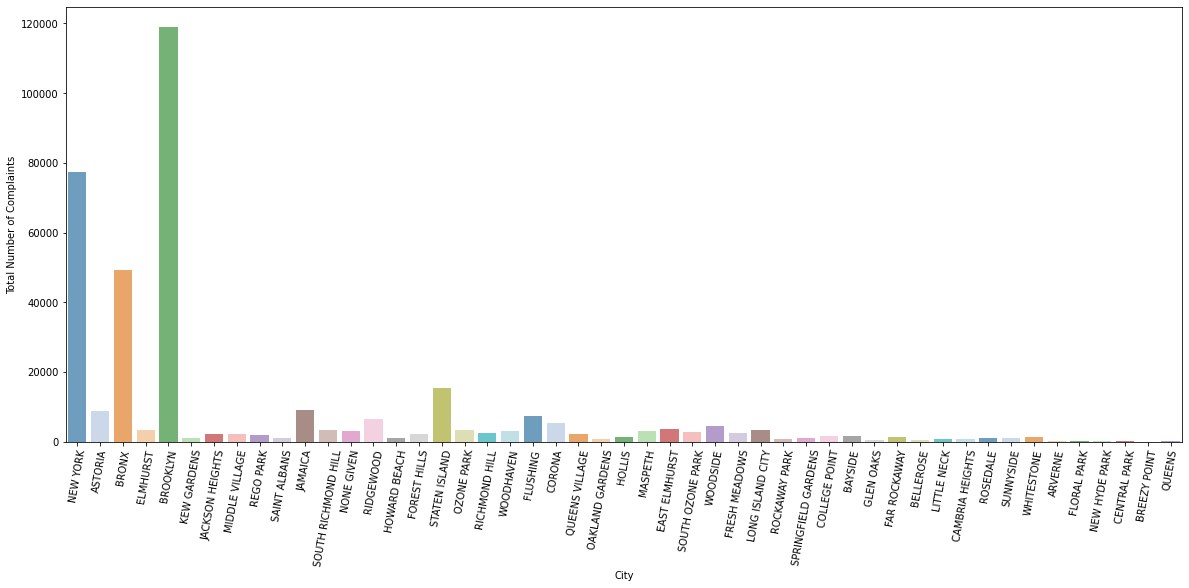

In [24]:
plt.figure(figsize = (20,8))
sns.countplot(x=cust_serv_df['City'], palette='tab20', alpha=.7)
plt.xticks(rotation=80)
plt.xlabel("City")
plt.ylabel("Total Number of Complaints")

# Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [25]:
# subset of only brooklyn complaints

brooklyn_df = cust_serv_df[cust_serv_df['City'] == 'BROOKLYN']

In [26]:
# Create X and Y values and graph scatterplot of crimes in Brooklyn

# ordered_complaints = np.sort(brooklyn_df['Complaint Type'].unique())
# complaint_count = brooklyn_df.groupby(['Complaint Type']).count()['Created Date']
# plt.figure(figsize=(8,8))
# plt.scatter(ordered_complaints, complaint_count)
# plt.xticks(rotation = 80)
# plt.title('All Complaints in the city of Brooklyn')
# plt.show()

In [27]:
# Drop Latitude and Longitude for when they weren't given

brooklyn_df.drop(brooklyn_df.index[brooklyn_df['Longitude'] == 'Not Filled In'], inplace=True)
brooklyn_df.drop(brooklyn_df.index[brooklyn_df['Longitude'] == 'Not Filled In'], inplace=True)

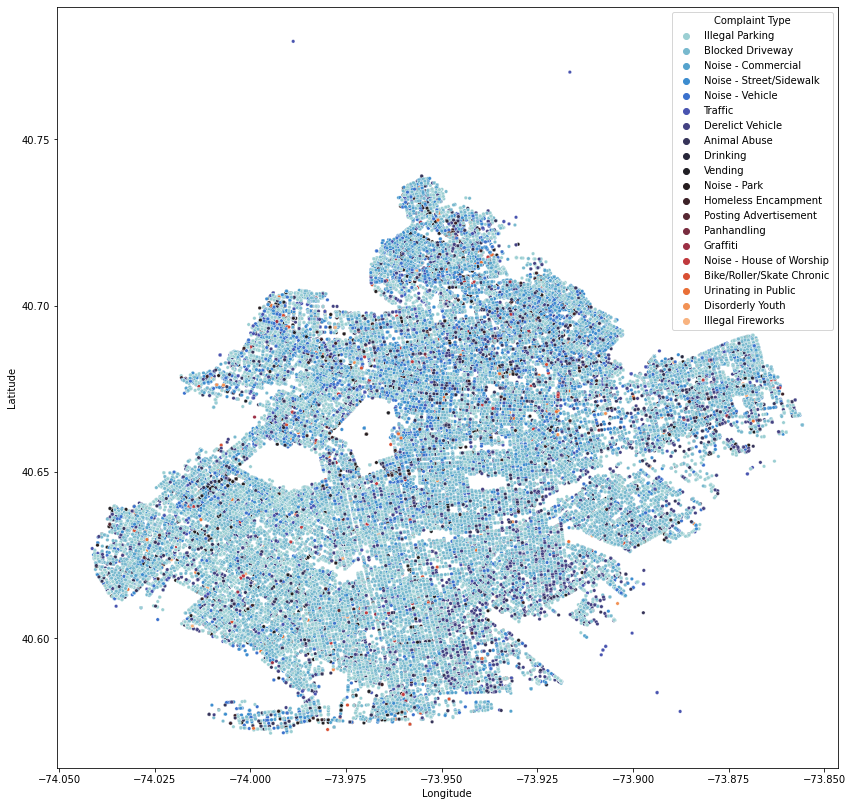

In [28]:
# Graph scatterplot with x and y set to the Longitude and Latitude with the colors sorted by Complaint Type to see the spread of complaints across Brooklyn

fig = plt.gcf()
fig.set_size_inches(14, 14)
sns.scatterplot(data=brooklyn_df, x='Longitude', y='Latitude', hue='Complaint Type', palette='icefire', s=12)
plt.show()

In [29]:
# Establish x and y varibales with the same parameters as above

hex_x = brooklyn_df['Longitude']
hex_y = brooklyn_df['Latitude']

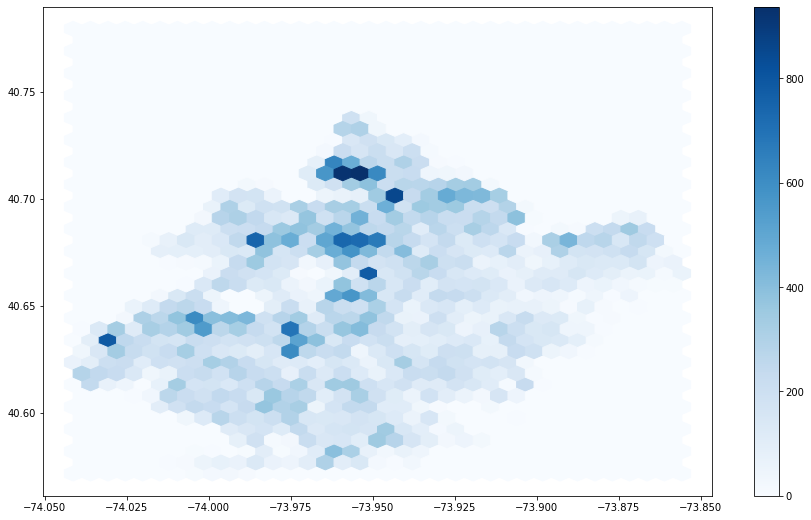

In [30]:
plt.figure(figsize=(15,9)) 
plt.hexbin(hex_x, hex_y, gridsize = 35, cmap ='Blues')
plt.colorbar()
plt.show()

# 3. Find major types of complaints:

Text(0.5, 1.0, 'All Complaints With Total Number of Complaints')

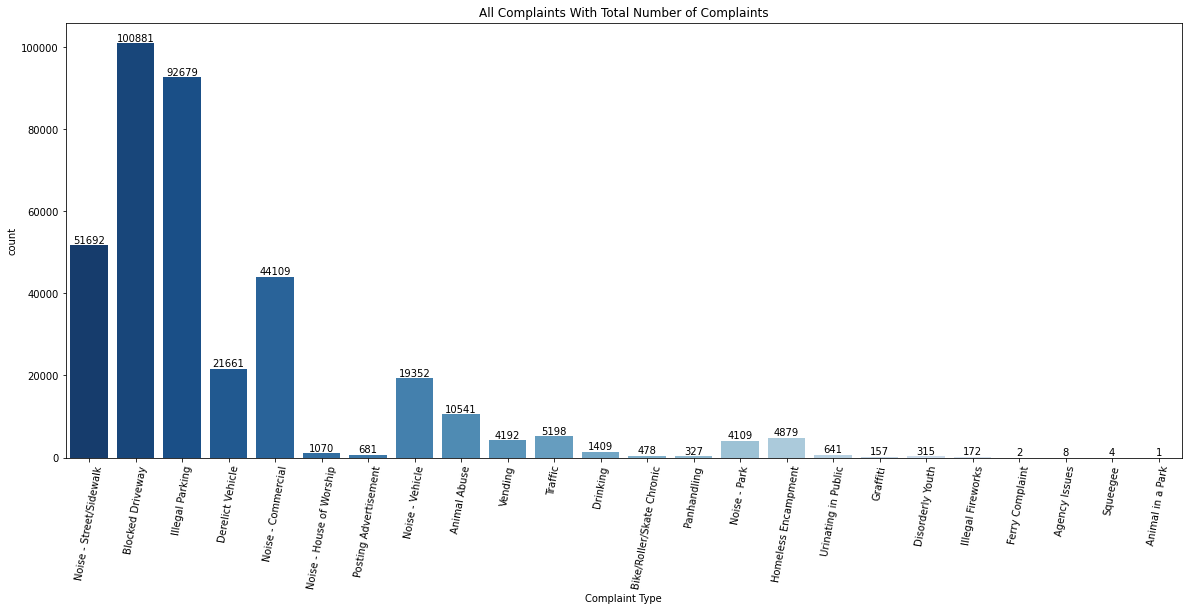

In [31]:
# Plot a bar graph of count vs. complaint types

plt.figure(figsize = (20,8))
plt.xticks(rotation=80)
complaint_plot = sns.countplot(x=cust_serv_df['Complaint Type'], palette='Blues_r')
for container in complaint_plot.containers: # display count
        complaint_plot.bar_label(container)
plt.xlabel("Complaint Type")
plt.title('All Complaints With Total Number of Complaints')

# Find the top 10 types of complaints

In [32]:
# Find out how many of each type of complaint have been created

complaint_count = cust_serv_df.groupby(['Complaint Type']).count()['Created Date']

In [33]:
# sort and only view the top 10

top_ten = complaint_count.sort_values(ascending=False).head(10)

In [34]:
top_ten

Complaint Type
Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Created Date, dtype: int64

# Display the types of complaints in each city in a separate dataset

In [35]:
city_complaints = cust_serv_df.pivot_table(index=['Complaint Type'], columns='City', aggfunc="size", fill_value=0).T

In [36]:
# Drop 'NONE GIVEN'

city_complaints.drop('NONE GIVEN', inplace=True)

In [37]:
city_complaints

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,46,0,0,50,32,2,1,0,1,...,14,2,29,10,1,0,0,1,1,1
ASTORIA,0,170,0,16,3595,440,5,43,0,4,...,21,64,554,236,2,3,0,60,10,57
BAYSIDE,0,53,0,0,514,231,2,1,0,3,...,3,4,17,24,0,0,0,9,0,2
BELLEROSE,0,15,0,1,138,120,2,1,0,0,...,1,1,13,11,1,1,0,9,1,0
BREEZY POINT,0,2,0,0,3,3,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,0,1971,0,22,17063,2403,66,206,0,15,...,90,548,9146,3556,20,18,0,427,54,433
BROOKLYN,0,3191,0,124,36447,6259,79,291,0,60,...,389,1575,13984,5966,49,58,0,1258,155,575
CAMBRIA HEIGHTS,0,15,0,0,177,148,0,0,0,0,...,2,0,29,100,0,0,0,7,0,0
CENTRAL PARK,0,0,0,0,0,0,0,0,0,0,...,0,0,105,0,0,0,0,0,0,0



# 4. Visualize the major types of complaints in each city

 - Displaying the top five (5) complaint types in each city in a barplot.

In [38]:
# Find all unique cities, convert to a list, and then drop the 'nan' value

cities = cust_serv_df['City'].unique()
city_list = cities.tolist()
city_list = [x for x in city_list if str(x) != 'NONE GIVEN']

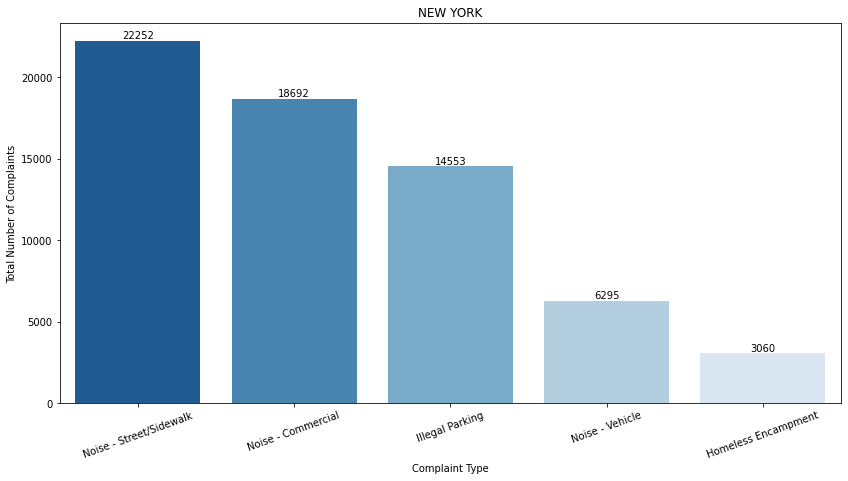

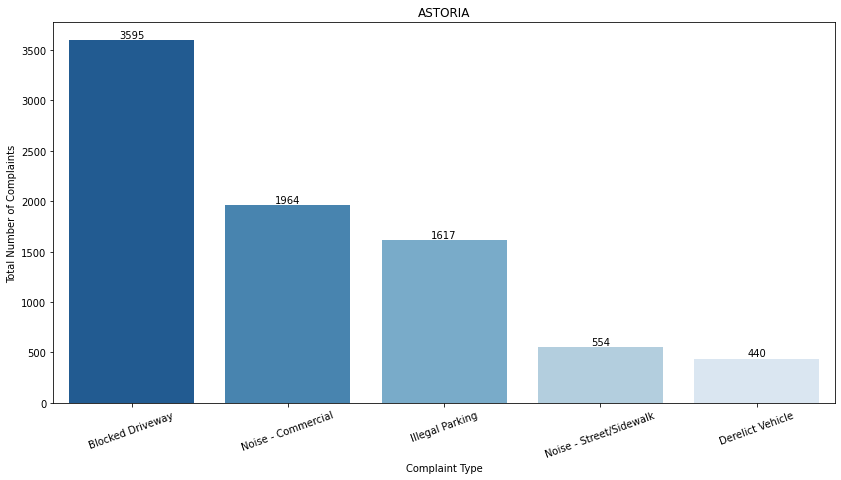

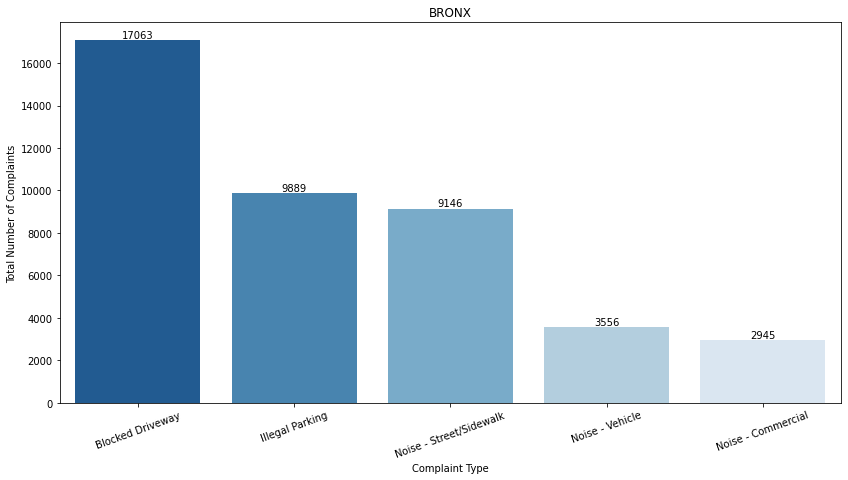

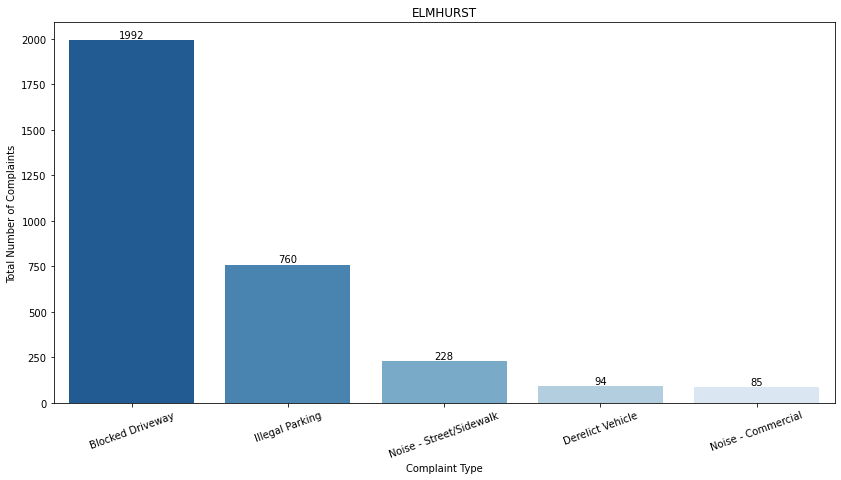

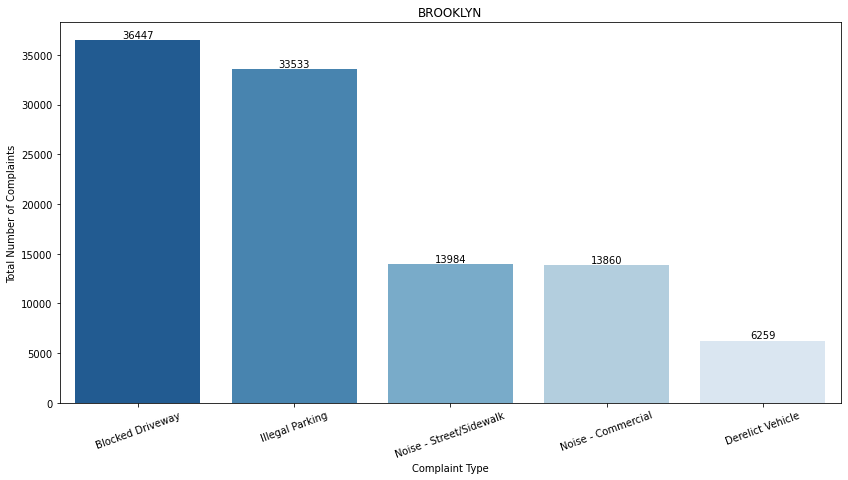

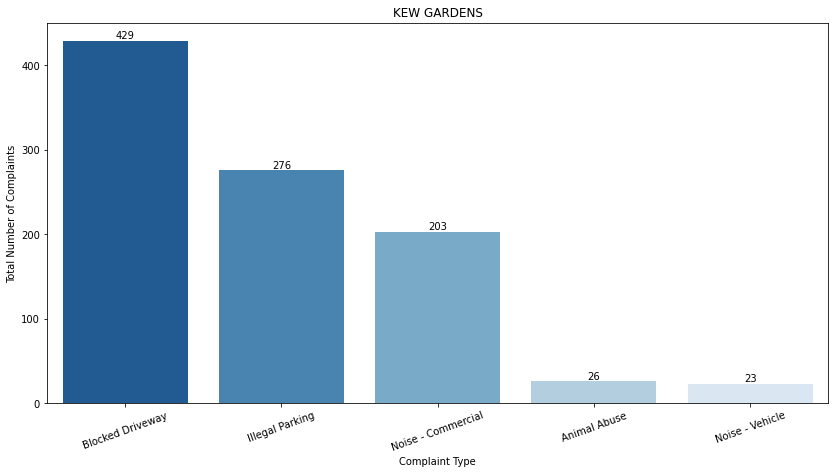

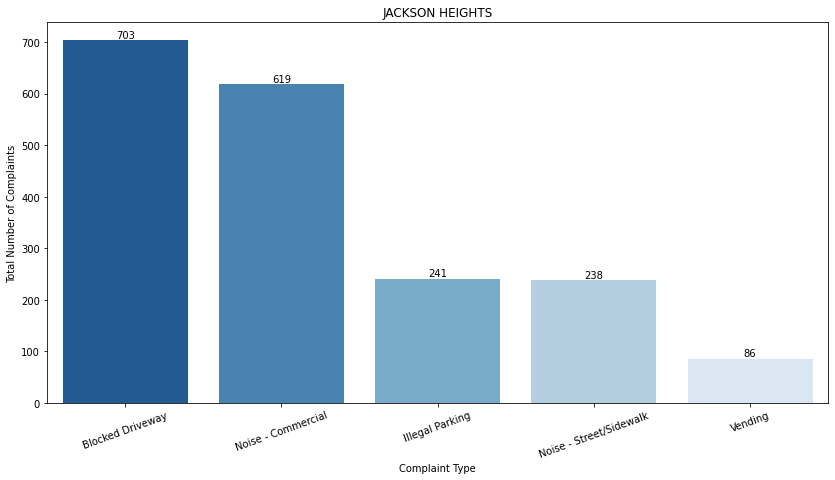

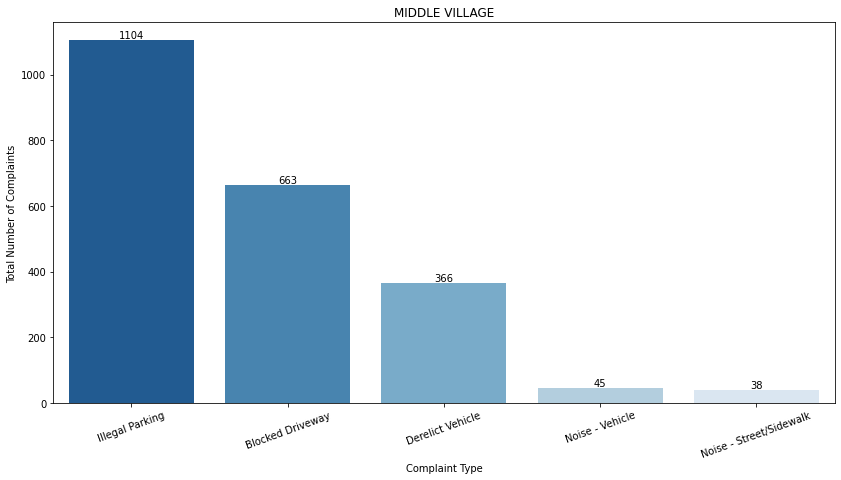

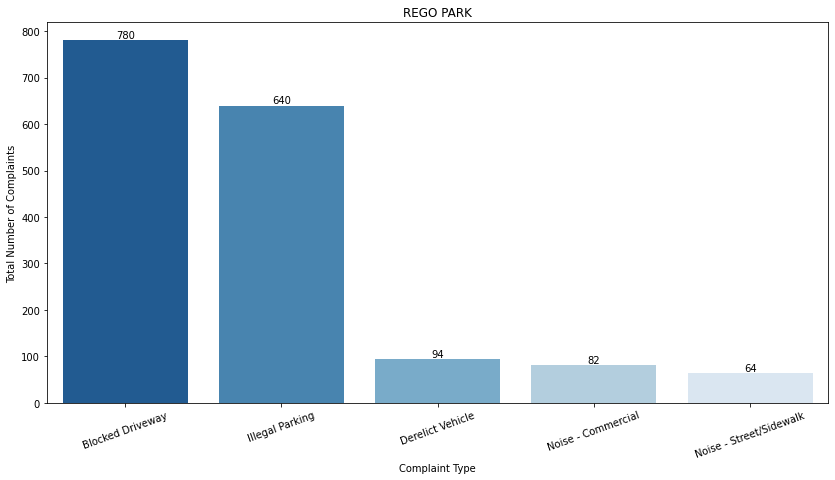

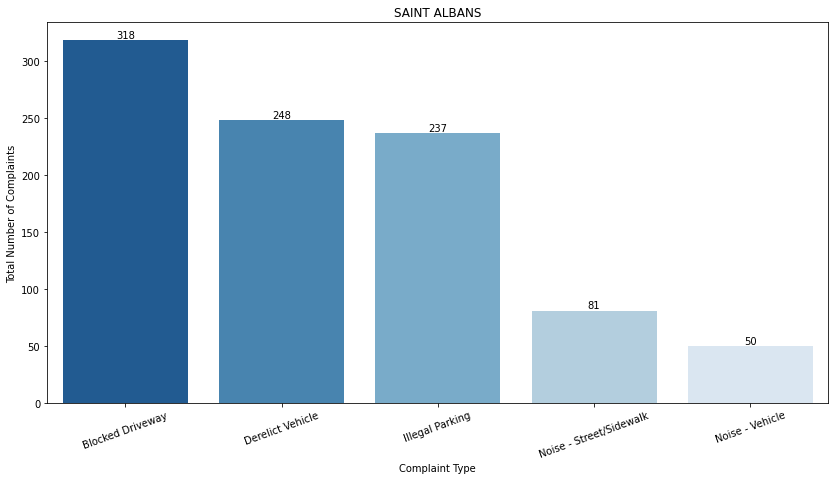

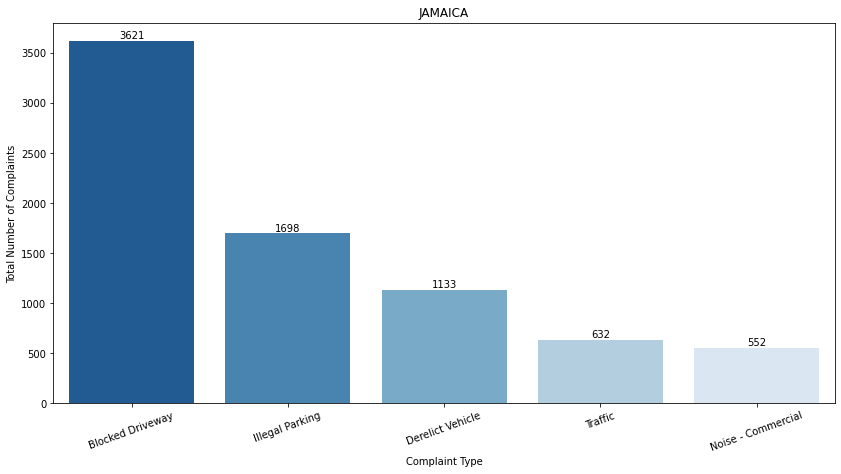

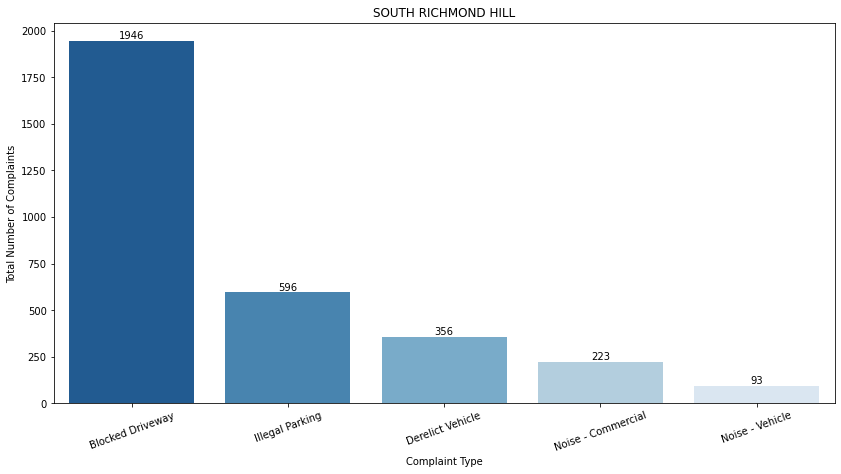

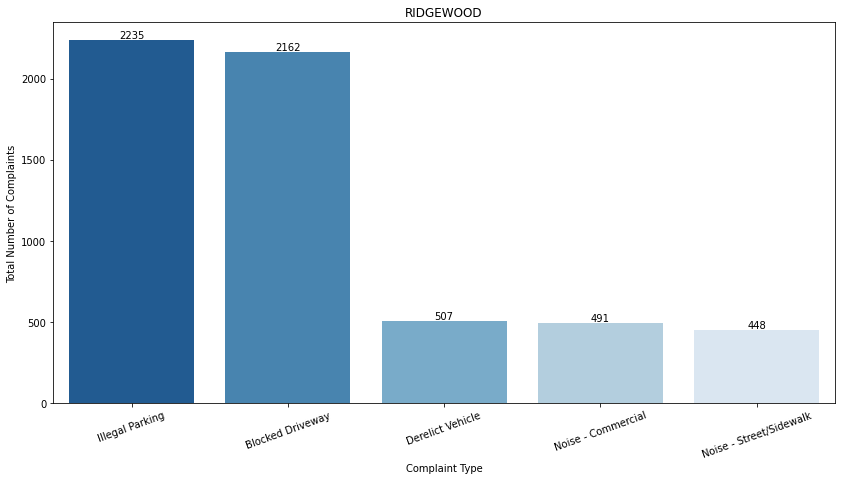

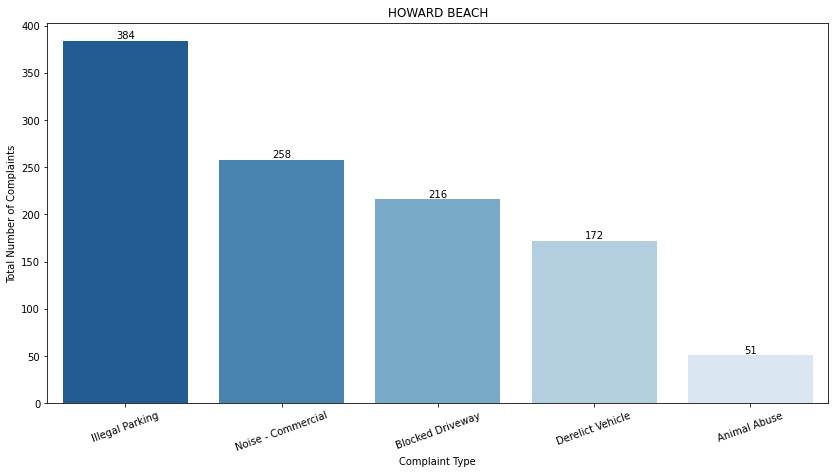

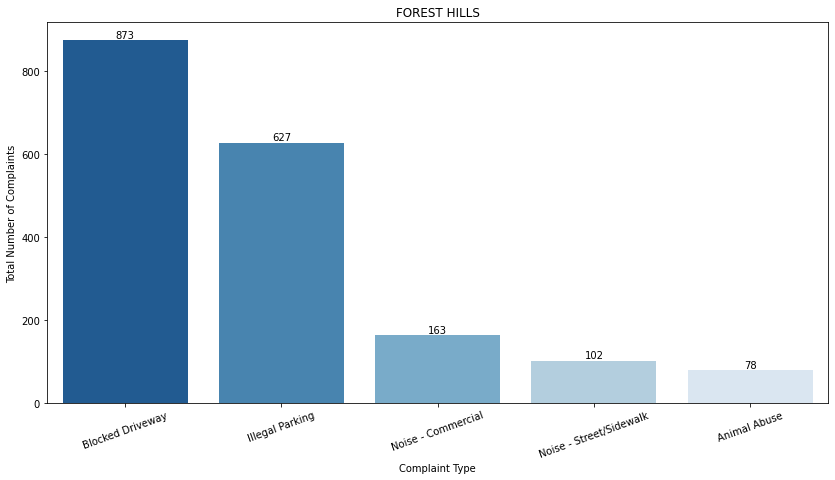

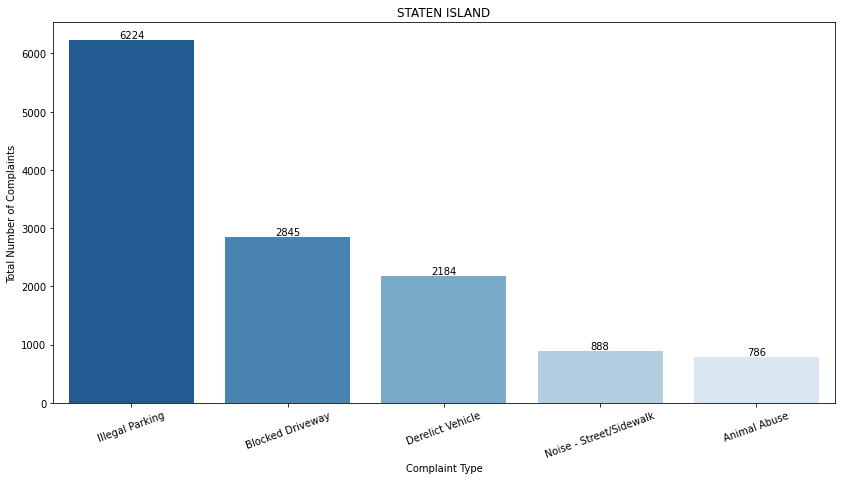

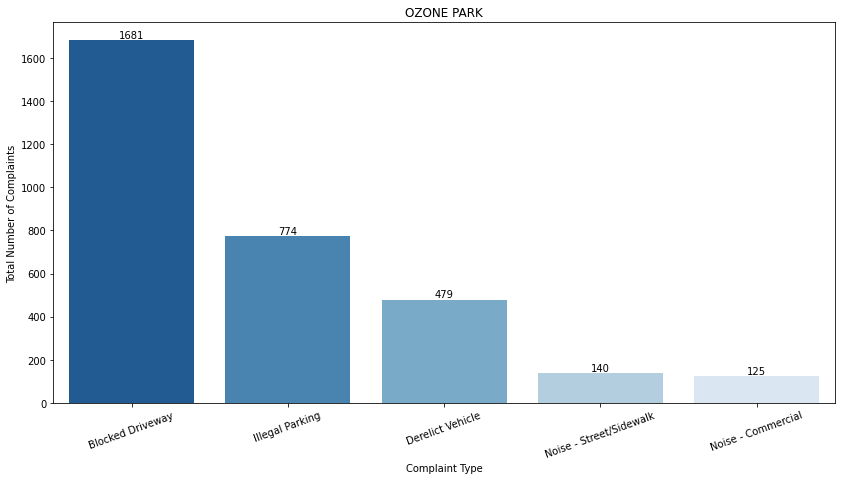

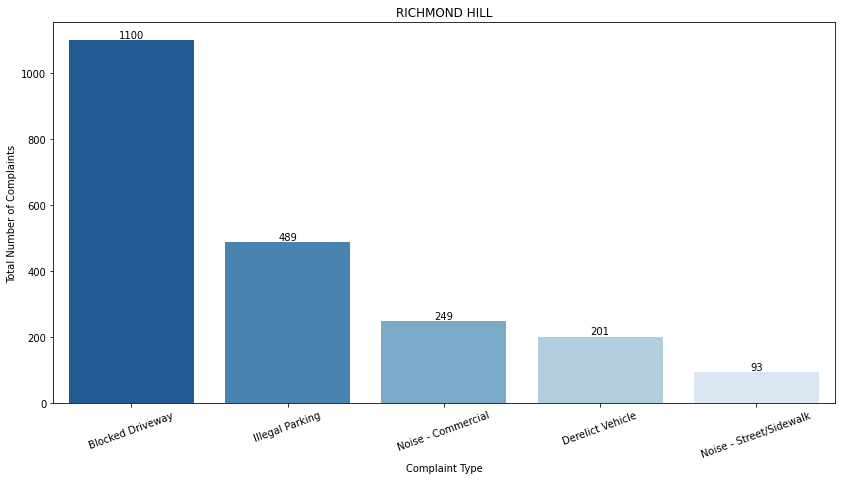

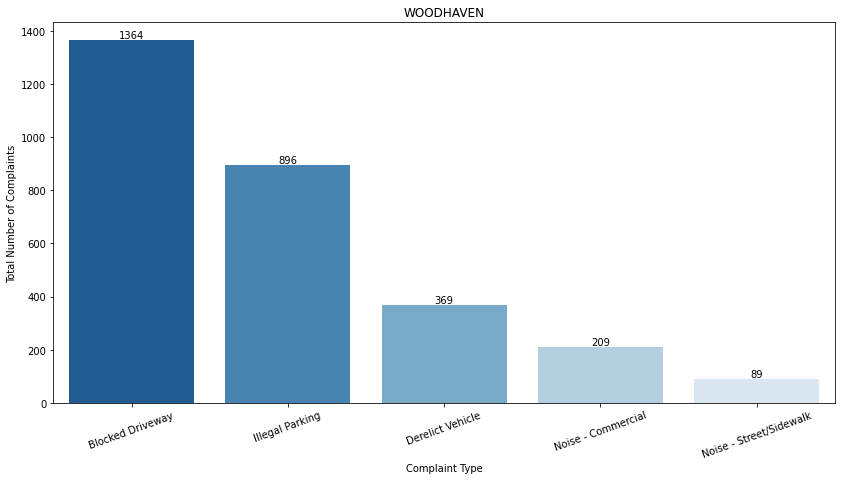

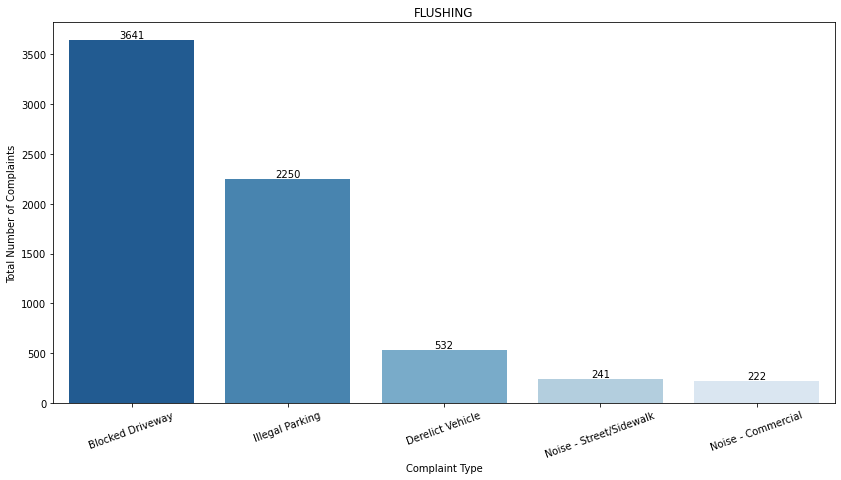

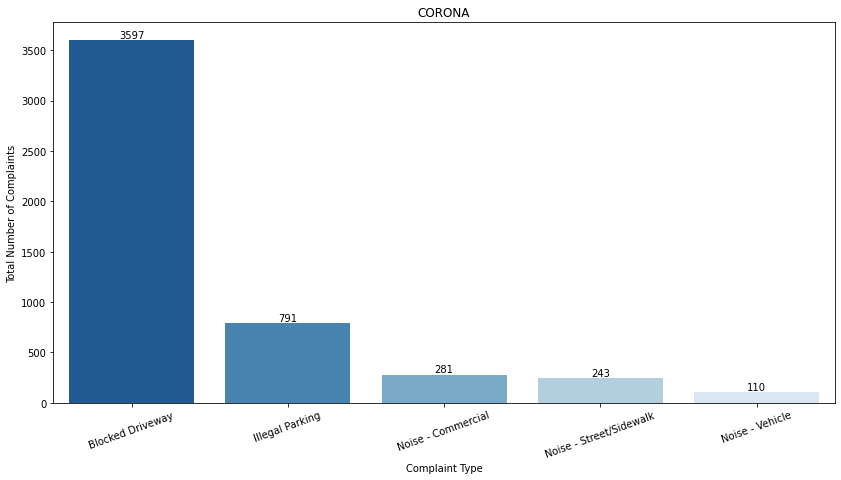

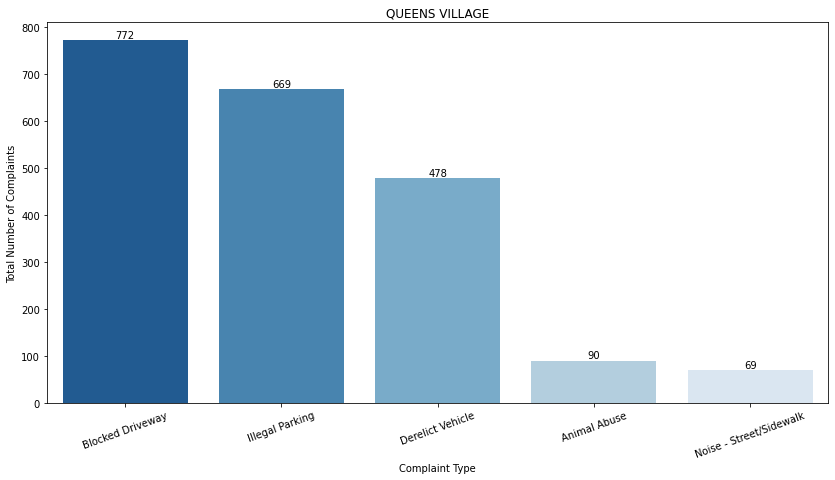

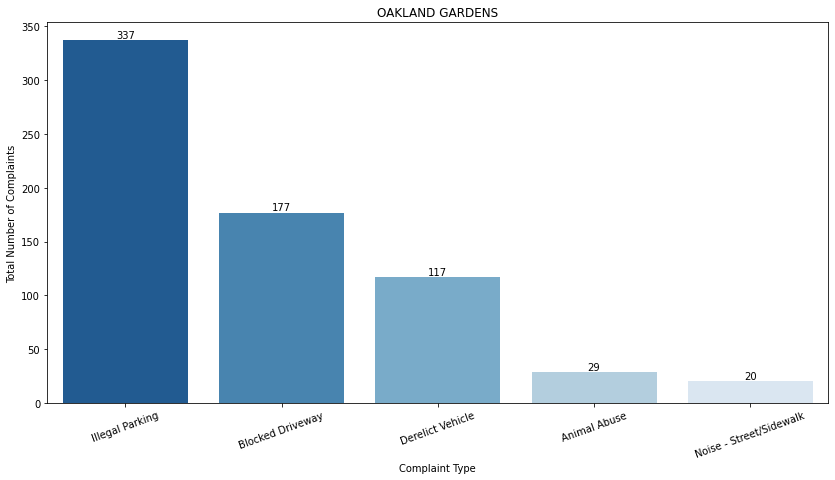

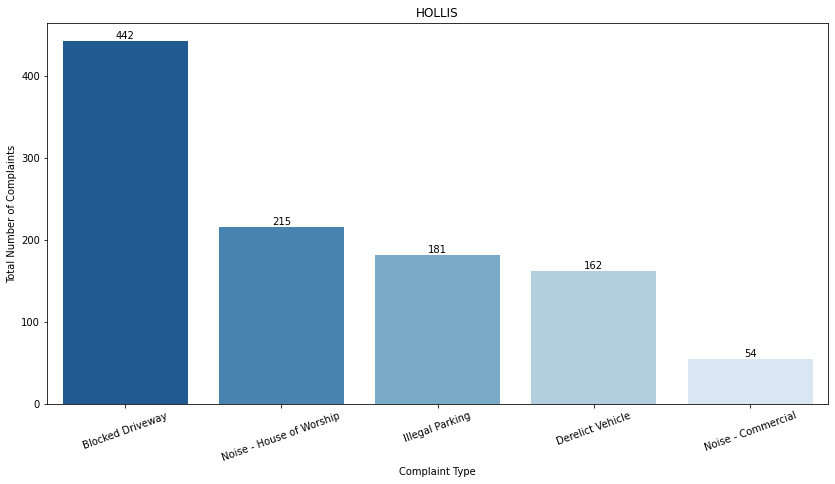

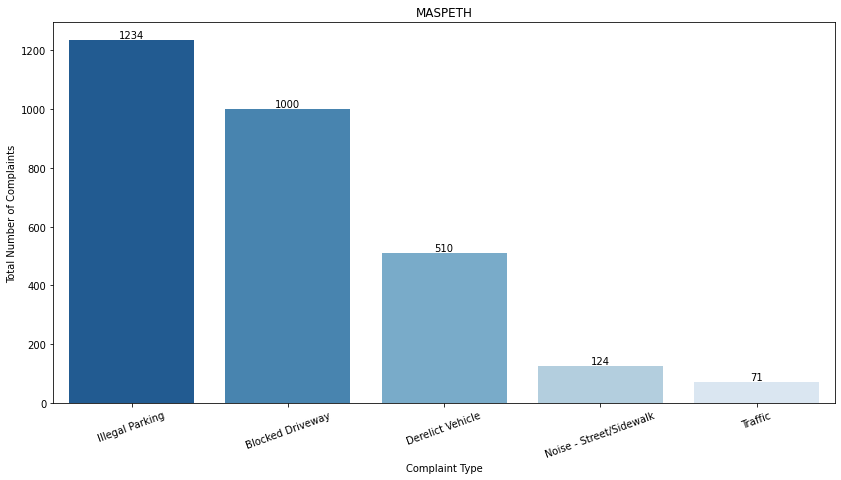

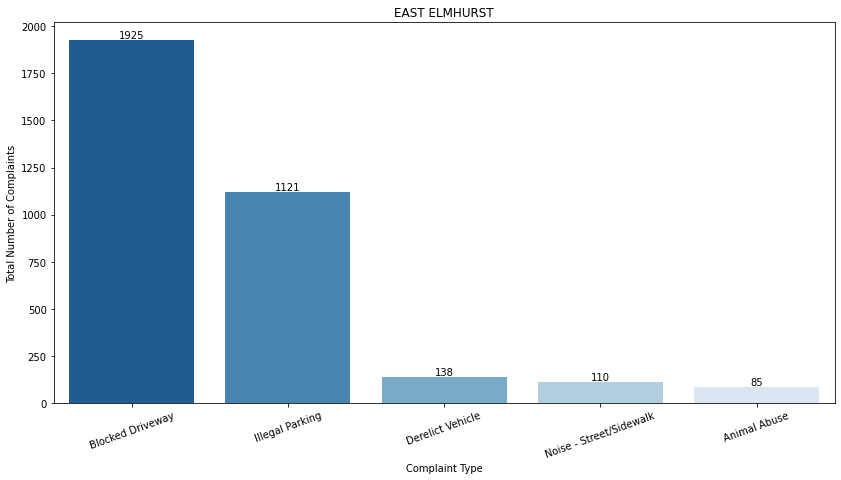

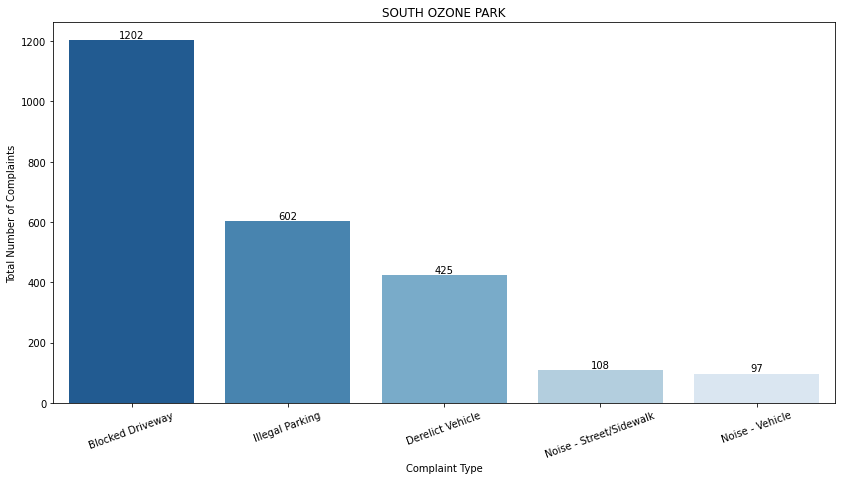

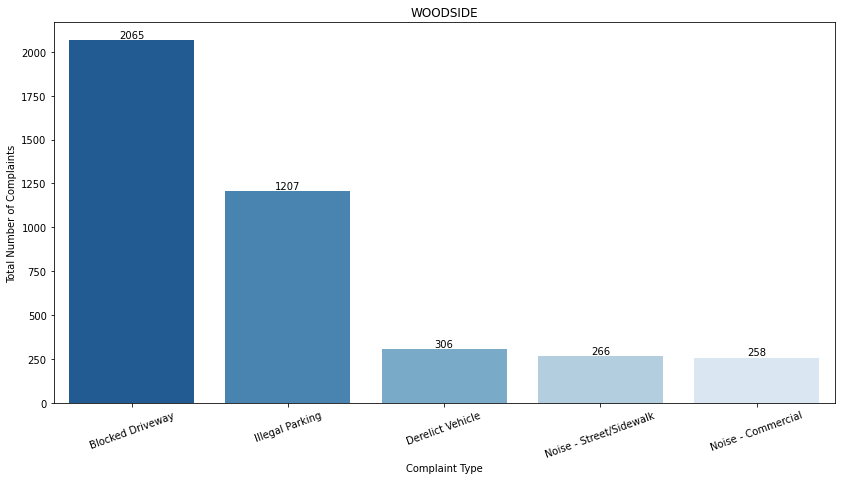

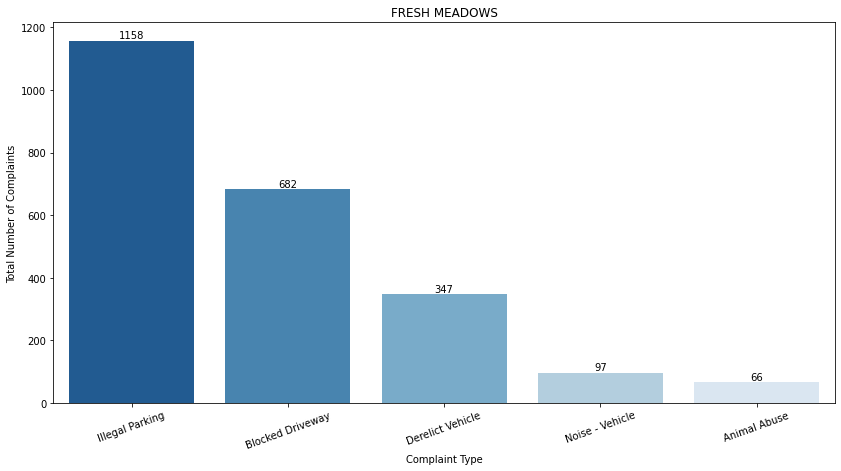

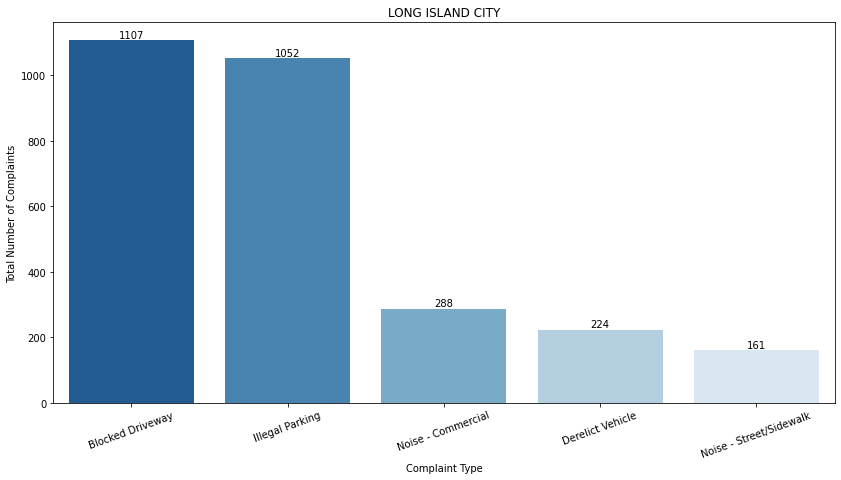

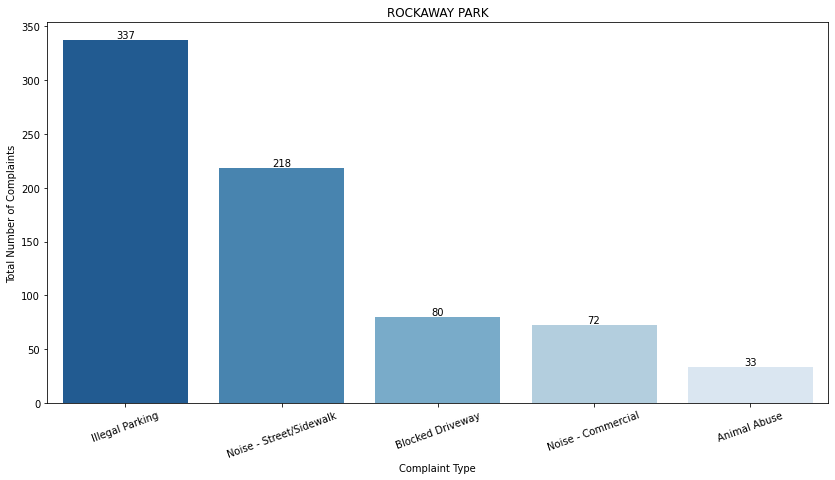

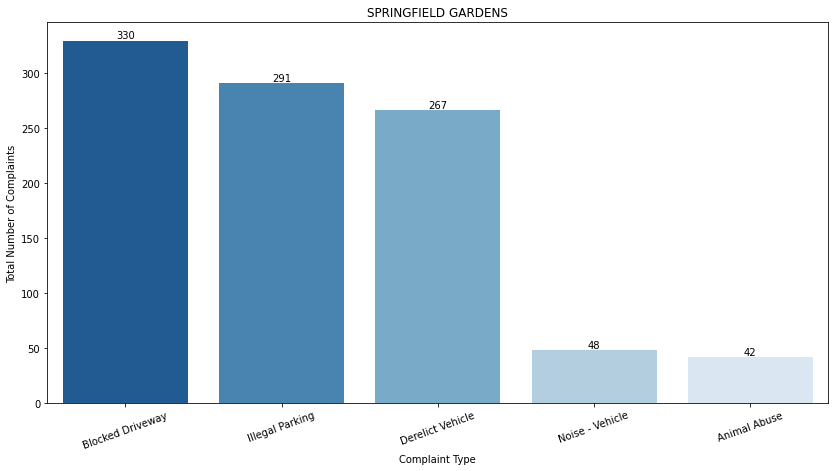

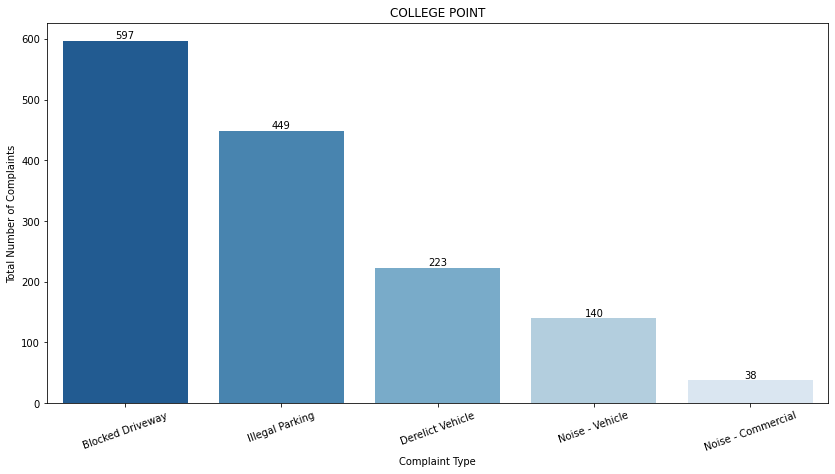

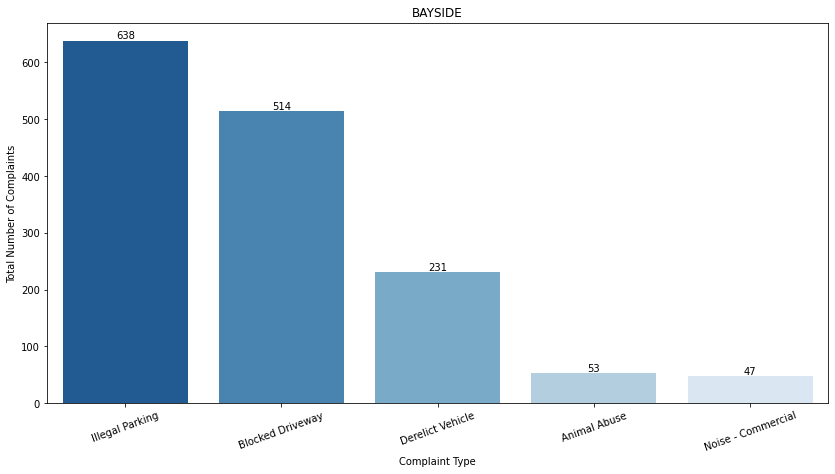

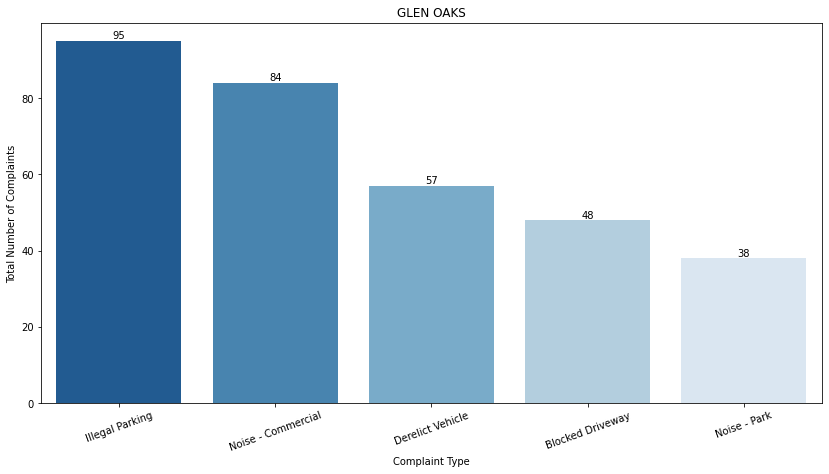

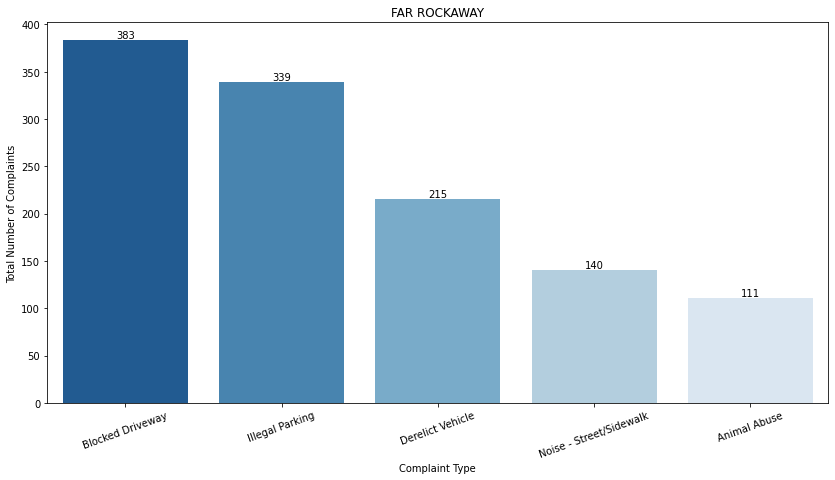

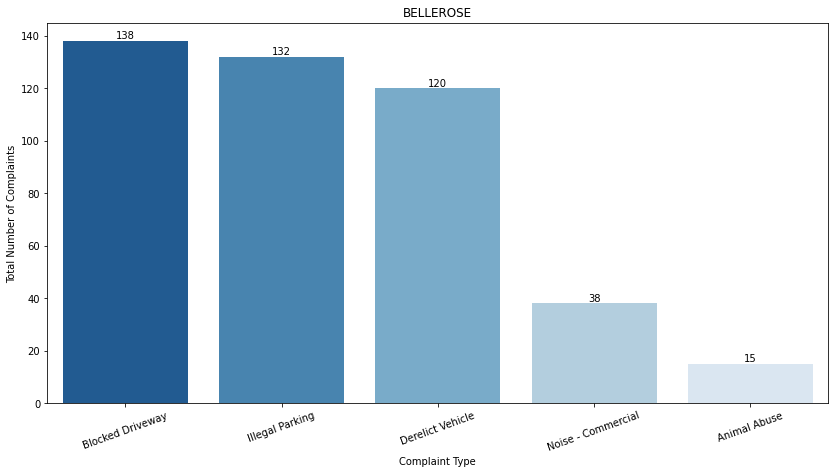

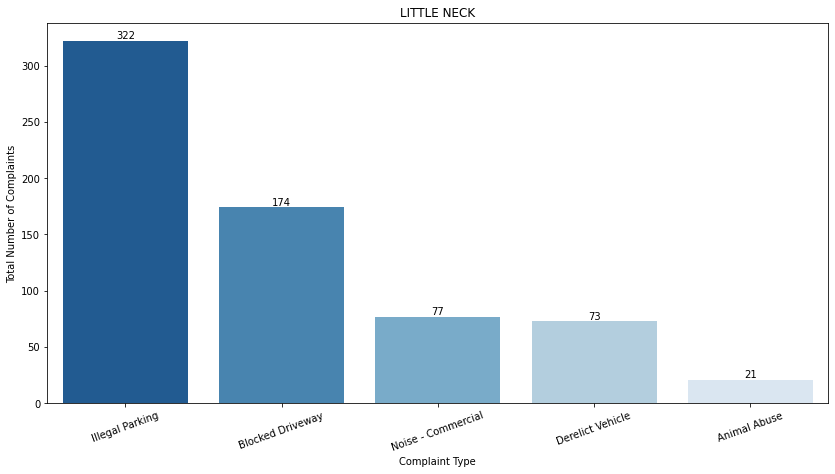

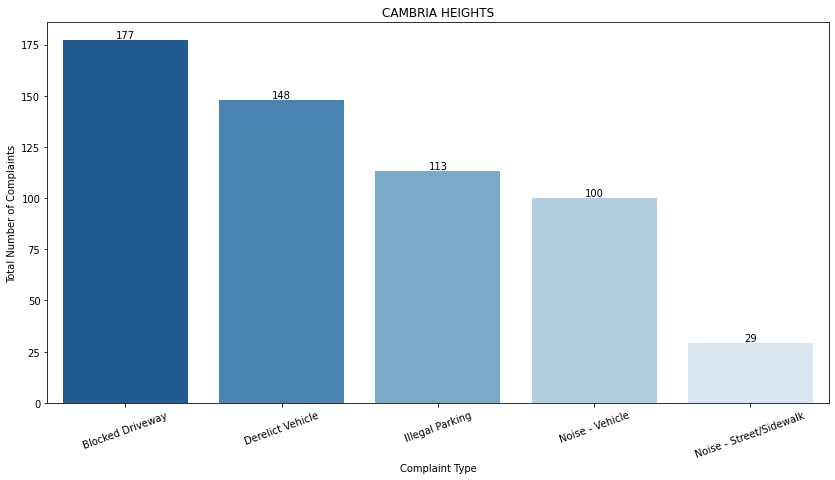

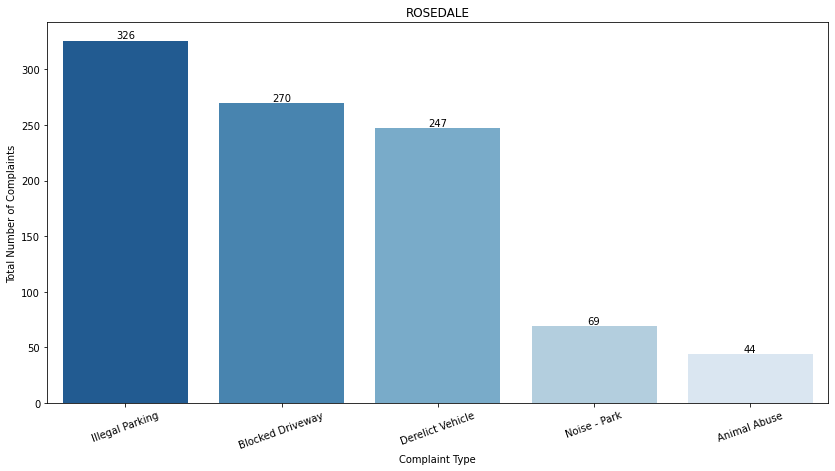

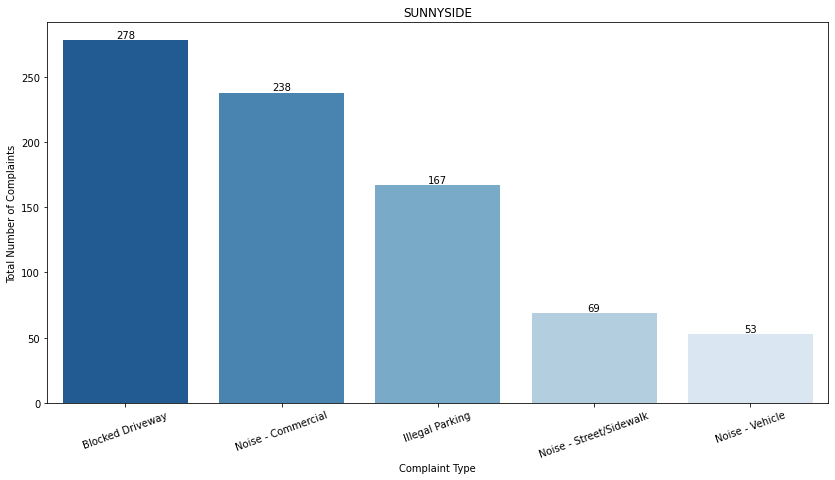

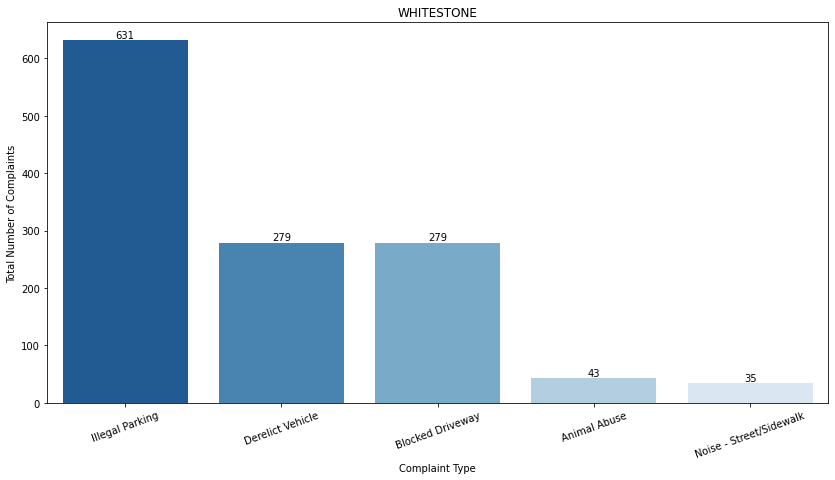

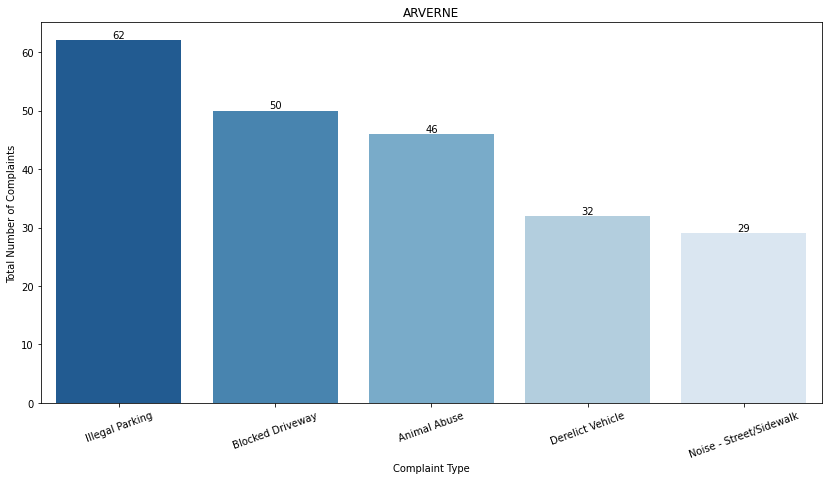

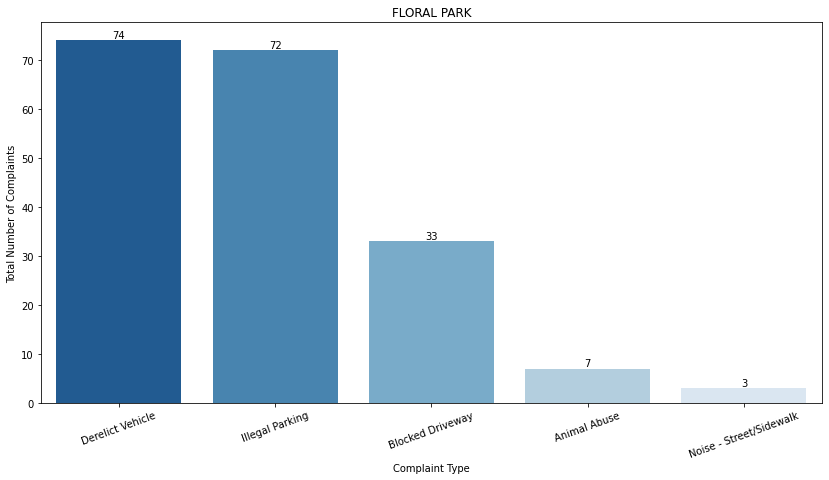

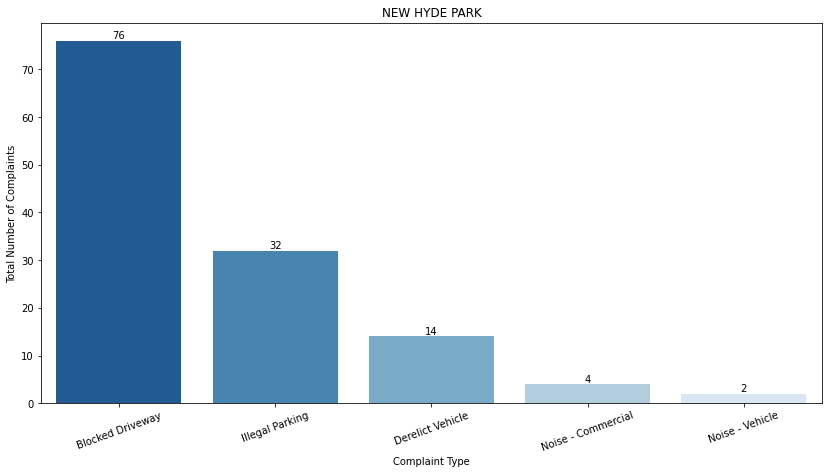

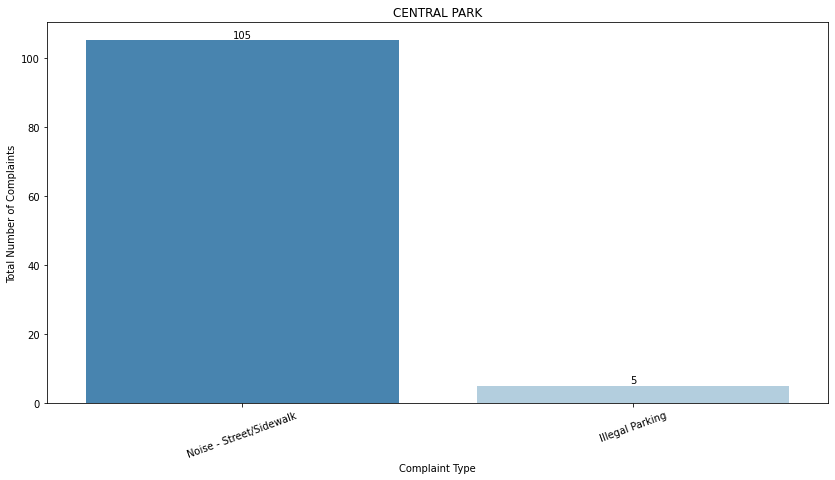

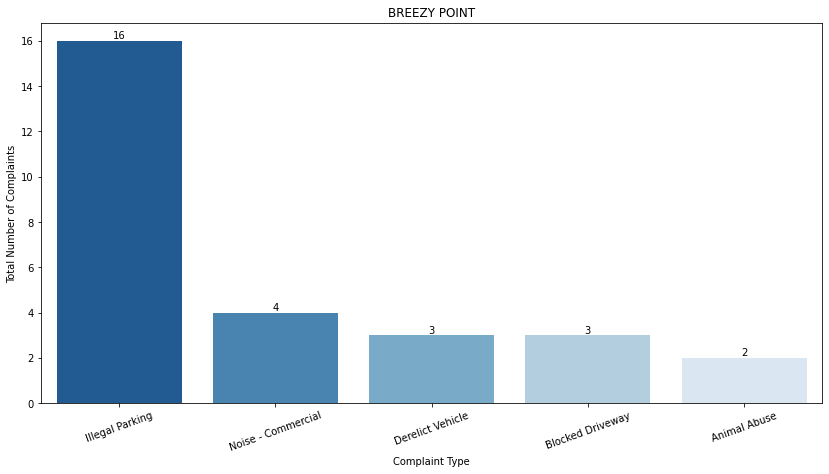

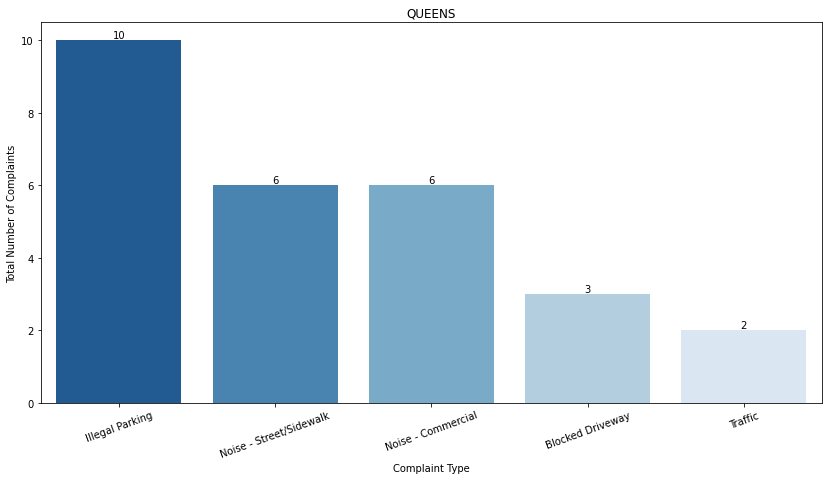

In [39]:
# Iterate over the list and make a barplot for each city individually of the top 5 complaints with the count included

for city in city_list:
    city_df = cust_serv_df[cust_serv_df['City'] == city] # Create temp dataframe
    head = city_df.groupby(['Complaint Type']).count()['Created Date'].sort_values(ascending=False).head(5) # Identify top 5 complaints in a Series -- this can be adjusted for any number
    plt.figure(figsize = (14,7))
    plt.xticks(rotation=20)
    plt.ylabel("Total Number of Complaints")
    plot = sns.barplot(x = head.index, y = head.values, palette='Blues_r') # plot graph of series with indicies and values
    for container in plot.containers: # display values
        plot.bar_label(container)
    plt.title(city)
    plt.show()
    print()
    print() #adding space between the graphs

 - Can use this function in order to graph all complaints for all cities

In [40]:
# for city in city_list:
#    city_df = cust_serv_df[cust_serv_df['City'] == city]
#    head = city_df.groupby(['Complaint Type']).count()['Created Date'].sort_values(ascending=False)
#    sns.countplot(data = city_df, x='City', hue='Complaint Type')
#    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#    plt.show()


# 5. Check if the average response time across various types of complaints

In [41]:
# Make a new Dataframe with the needed columns

response_df = cust_serv_df[['Created Date', 'Closed Date', 'Complaint Type']]

In [42]:
# Drop 'Not Closed' rows

response_df.drop(response_df.index[response_df['Closed Date'] == 'Not Closed'], inplace=True)

In [43]:
# Convert Date columns to data type that will allow us to perform math to see the difference in created and closed timeline

response_df['Created Time Number'] = pd.to_datetime(response_df['Created Date'])
response_df['Closed Time Number'] = pd.to_datetime(response_df['Closed Date'])

In [44]:
# Find the time difference from when the complaint was created and when it was closed

response_df['Response Time'] = response_df['Closed Time Number'] - response_df['Created Time Number']

In [45]:
# Make a smaller dataframe of just complaint type and response time

complaint_response_time = response_df[['Complaint Type', 'Response Time']]

In [46]:
#convert Response Time to seconds so that we can find the mean

complaint_response_time['Response Time'] = complaint_response_time['Response Time'].dt.total_seconds()

In [47]:
# Find the mean of the various Complaint Types across all cities, then divide by 60 to convert to minutes and limit result to 2 decimal places

average_response_time = round(complaint_response_time.groupby(['Complaint Type']).mean()/60, 2)

In [48]:
# Display the response time, sorted by shortest to longest average response time

average_response_time.sort_values(by = 'Response Time', ascending=True)

,Response Time
Complaint Type,
Posting Advertisement,121.44
Illegal Fireworks,168.56
Noise - Commercial,184.76
Noise - House of Worship,189.85
Noise - Park,203.77
Noise - Street/Sidewalk,203.85
Traffic,205.15
Disorderly Youth,206.06
Noise - Vehicle,209.36
